¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>



# ¿Cómo podemos aumentar los ingresos? 

En este proyecto, como analista en una gran tienda en línea, el objetivo es aumentar los ingresos a través de la identificación y priorización de hipótesis estratégicas y el análisis de un test A/B. En colaboración con el departamento de marketing, se ha recopilado una lista de hipótesis que podrían impactar positivamente en los ingresos de la tienda.

El proyecto se divide en dos partes principales:

Parte 1: Priorización de Hipótesis

El primer paso es evaluar y priorizar nueve hipótesis contenidas en el archivo hypotheses_us.csv. Cada hipótesis está acompañada de métricas específicas: Reach (alcance), Impact (impacto), Confidence (confianza) y Effort (esfuerzo), que serán utilizadas para determinar cuáles tienen el mayor potencial de éxito y deben ser probadas primero.

Parte 2: Análisis del Test A/B
La segunda parte del proyecto se centra en analizar los resultados de un test A/B, cuyas métricas están recogidas en los archivos orders_us.csv y visitors_us.csv. Este análisis incluirá la representación gráfica del ingreso acumulado por grupo, el tamaño promedio de pedido acumulado, y la diferencia relativa en el tamaño de pedido promedio acumulado entre los grupos A y B, entre otros análisis. El objetivo es extraer conclusiones significativas que permitan tomar una decisión sobre la efectividad de las estrategias probadas: seleccionar un grupo líder, concluir que no hay diferencias significativas entre los grupos, o continuar con la prueba para obtener más datos.

Este enfoque integral nos permitirá identificar las estrategias más efectivas para incrementar los ingresos de la tienda, basándonos en datos concretos y decisiones informadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola Ariel!. Buen trabajo con el desarrollo de la sección de introducción del proyecto. Buen trabajo.  </div>



## Primera Parte

### Inicialización

In [1]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Cargar datos

In [2]:
#Cargar los archivos de datos en un dataframe
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo importanto las bases de datos y las librerias necesarias para el ejercicio</div>

### Preparar los datos

In [3]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Imprime una muestra de los datos
display(df_hypotheses)

duplicates = df_hypotheses.duplicated().sum()
print("En la tabla Hypotheses_US exiten: ", duplicates , "valores duplicados")

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


En la tabla Hypotheses_US exiten:  0 valores duplicados


### Corrección de los datos

<font color='#613EF0'>Debido a que todas las columnas del Dataframe son visibles, se puede concluir que no existen ni valores ausentes ni valores duplicados. Por ahora, lo único que se realizará es observar cuales son los nombres de las hipótesis a evaluar.</font>

In [5]:
# Imprimir todos los valores únicos en la columna 'Hypothesis'
unique_hypotheses = df_hypotheses['Hypothesis'].unique()
print("Nombre de las hipótesis: ")
print(unique_hypotheses)

Nombre de las hipótesis: 
['Add two new channels for attracting traffic. This will bring 30% more users'
 'Launch your own delivery service. This will shorten delivery time'
 "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"
 'Change the category structure. This will increase conversion since users will find the products they want more quickly'
 'Change the background color on the main page. This will increase user engagement'
 'Add a customer review page. This will increase the number of orders'
 'Show banners with current offers and sales on the main page. This will boost conversion'
 'Add a subscription form to all the main pages. This will help you compile a mailing list'
 'Launch a promotion that gives users discounts on their birthdays']


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con este primer análisis de las bases de datos con las que vamos a trabajar  </div>

### Análisis de los datos
#### Framework ICE
<font color='#613EF0'>El Framework Ice se calcula mediante la fórmula: ICE SCORE = (Impacto * Confianza) / Esfuerzo</font>

In [6]:
df_hypotheses['ICE'] = ((df_hypotheses['Impact'] * df_hypotheses['Confidence']) / df_hypotheses['Effort'] )

print(df_hypotheses[['Hypothesis','ICE']].sort_values('ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


#### Framework RICE
<font color='#613EF0'>El Framework RICE se calcula mediante la fórmula: RICE SCORE = (Alcance * Impacto * Confianza) / Esfuerzo</font>

In [7]:
df_hypotheses['RICE'] = ((df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']) / df_hypotheses['Effort'])

print(df_hypotheses[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Conclusiones de la Primera Parte

1.- La Hipótesis 7 ("Agregar un formulario de suscripción a todas las páginas principales"): Pasa de estar en la tercera posición en la priorización con ICE(11.2) a ocupar la primera posición con RICE(112.0). Este cambio significativo se debe a que esta hipótesis tiene un alto valor de Reach(alcance), lo que indica que la acción puede afectar a un gran número de usuarios, multiplicando su impacto cuando se utiliza la métrica RICE. 

2.- La Hipótesis 2 ("Agregar bloques de recomendación de productos a la tienda"): Sube de la quinta posición con ICE(7.0) a la segunda posición con RICE(56.0). Este cambio también es impulsado por un alto valor de Reach, sugiriendo que la implementación de recomendaciones de productos podría afectar a una gran base de usuarios, aumentando su prioridad al considerar tanto el alcance como el impacto. 

3.- La Hipótesis 0 ("Agregar dos nuevos canales para atraer tráfico"): Se mantiene en una posición alta en ambas métricas, pasando de la segunda posición con ICE (13.3) a la tercera con RICE (40.0). Aunque su impacto relativo se mantiene constante, su alta prioridad en ambas métricas indica que es una acción valiosa tanto por su impacto como por su alcance.

4.- La Hipótesis 8 ("Lanzar una promoción que ofrezca descuentos") baja de la primera posición con ICE (16.2) a la quinta con RICE (16.2). Este cambio refleja un Reach limitado a pesar de tener un alto impacto y confianza. La promoción podría no ser tan efectiva en términos de alcance total, disminuyendo su prioridad cuando se considera el número de usuarios afectados.

* <font color='#613EF0'>El cambio en la priorización se debe principalmente a la consideración del Reach en la fórmula RICE. Mientras que ICE solo toma en cuenta el impacto, la confianza y el esfuerzo, RICE añade el alcance, es decir, la cantidad de usuarios potencialmente afectados por la hipótesis. Esto hace que las hipótesis con un alto Reach suban en la lista de prioridades cuando se utiliza RICE, ya que su potencial para generar ingresos se amplía a una base de usuarios más amplia.</font>

* <font color='#613EF0'>Al utilizar RICE, se obtiene una visión más holística que no solo considera la efectividad de una acción, sino también cuántas personas pueden beneficiarse de ella, proporcionando una guía más completa para la toma de decisiones estratégicas.</font>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, Ariel. Excelente trabajo aplicando, analizando y comparando los frameworks RICE e ICE. Además, hiciste un excelente trabajo desarrollando un análisis de los hallazgos para la priorización de las hipótesis.  </div>

## Segunda Parte

### Cargar datos

In [8]:
#Cargar los archivos de datos en un dataframe
df_orders = pd.read_csv('/datasets/orders_us.csv',sep=',')
df_visits = pd.read_csv('/datasets/visits_us.csv',sep=',')

### Preparar los datos

In [9]:
# Imprime una muestra de los datos
df_orders.info()
display(df_orders.head())

duplicatesO = df_orders.duplicated().sum()
print("En la tabla Orders exiten: ", duplicatesO , "valores duplicados")

print("<--------------------------------------------------------------------->")

df_visits.info()
display(df_visits.head())

duplicatesV = df_visits.duplicated().sum()
print("En la tabla Visits exiten: ", duplicatesV , "valores duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


En la tabla Orders exiten:  0 valores duplicados
<--------------------------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


En la tabla Visits exiten:  0 valores duplicados


### Corrección de los datos

#### Tabla Orders

<font color='#613EF0'>Luego de realizar las correcciones de la tabla "Orders", se concluye lo siguiente: </font>
* <font color='#613EF0'>No existe ningun valor ausente en las columnas.</font>
* <font color='#613EF0'>La columna 'date' fue transformada a tipo de dato datetime.</font>
* <font color='#613EF0'>La columna 'group' fue transformada a tipo de dato category.</font>
* <font color='#613EF0'>Tener visitantes que participaron en ambos grupos (A y B) puede introducir sesgos en los resultados y afectar la validez del test. Por lo tanto, lo más adecuado es eliminar a estos visitantes de ambos grupos para asegurar la integridad del experimento.</font>

In [10]:
print("----------------------Columna transactionId------------------------")

#Verificar si existen valores ausentes en esta columna
absents_tId = df_orders['transactionId'].isna().sum()
print("Existen: ", absents_tId, "valores ausentes en la columna ""transactionId")

print("----------------------Columna visitorId----------------")

#Verificar si existen valores ausentes en esta columna
absents_vId= df_orders['visitorId'].isna().sum()
print("Existen: ", absents_vId, "valores ausentes en la columna ""visitorId")

print("----------------------Columna date----------------")

#Verificar si existen valores ausentes en esta columna
absents_ordersdate= df_orders['date'].isna().sum()
print("Existen: ", absents_ordersdate, "valores ausentes en la columna ""date")

#Transformar el tipo de dato a datetime para reducir el tamaño del dataframe
df_orders['date'] =  pd.to_datetime(df_orders['date'], format="%Y-%m-%d")

print("----------------------Columna revenue----------------")

#Verificar si existen valores ausentes en esta columna
absents_ordersrev = df_orders['revenue'].isna().sum()
print("Existen: ", absents_ordersrev, "valores ausentes en la columna ""revenue")

# Obtener el valor máximo y mínimo de la columna 'Revenue'
max_costs = df_orders['revenue'].max()
min_costs = df_orders['revenue'].min()

print("Valor máximo en 'Revenue':", max_costs)
print("Valor mínimo en 'Revenue':", min_costs)

print("----------------------Columna group----------------")

#Verificar si existen valores ausentes en esta columna
absents_ordersgroup = df_orders['group'].isna().sum()
print("Existen: ", absents_ordersgroup, "valores ausentes en la columna ""group")

#Convertir el tipo de dato de Object a Categoria
df_orders['group'] = df_orders['group'].astype('category')

print("----------------------Visitantes en ambos test----------------")

# Contar las ocurrencias de cada visitante en ambos grupos
visitor_counts = df_orders.groupby('visitorId')['group'].nunique()

# Identificar los visitantes que están en ambos grupos
duplicated_visitors = visitor_counts[visitor_counts > 1].index

print(duplicated_visitors)

# Filtrar las filas que NO contienen visitantes duplicados
df_orders = df_orders[~df_orders['visitorId'].isin(duplicated_visitors)]

print("Datos después de eliminar visitantes en ambos grupos:")
df_orders.info()

----------------------Columna transactionId------------------------
Existen:  0 valores ausentes en la columna transactionId
----------------------Columna visitorId----------------
Existen:  0 valores ausentes en la columna visitorId
----------------------Columna date----------------
Existen:  0 valores ausentes en la columna date
----------------------Columna revenue----------------
Existen:  0 valores ausentes en la columna revenue
Valor máximo en 'Revenue': 19920.4
Valor mínimo en 'Revenue': 5.0
----------------------Columna group----------------
Existen:  0 valores ausentes en la columna group
----------------------Visitantes en ambos test----------------
Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 18011838

#### Tabla Visits

<font color='#613EF0'>Luego de realizar las correcciones de la tabla "Visits", se concluye lo siguiente: </font>
* <font color='#613EF0'>No existe ningun valor ausente en las columnas.</font>
* <font color='#613EF0'>La columna 'date' fue transformada a tipo de dato datetime.</font>
* <font color='#613EF0'>La columna 'group' fue transformada a tipo de dato category.</font>

In [11]:
print("----------------------Columna date----------------")

#Verificar si existen valores ausentes en esta columna
absents_visitsdate= df_visits['date'].isna().sum()
print("Existen: ", absents_visitsdate, "valores ausentes en la columna ""date")

#Transformar el tipo de dato a datetime para reducir el tamaño del dataframe
df_visits['date'] =  pd.to_datetime(df_visits['date'], format="%Y-%m-%d")


print("----------------------Columna group----------------")

#Verificar si existen valores ausentes en esta columna
absents_visitsgroup = df_visits['group'].isna().sum()
print("Existen: ", absents_visitsgroup, "valores ausentes en la columna ""group")

#Convertir el tipo de dato de Object a Categoria
df_visits['group'] = df_visits['group'].astype('category')


print("----------------------Columna visits----------------")

#Verificar si existen valores ausentes en esta columna
absents_v= df_visits['visits'].isna().sum()
print("Existen: ", absents_v, "valores ausentes en la columna ""visits")

# Obtener el valor máximo y mínimo de la columna 'Revenue'
max_visits = df_visits['visits'].max()
min_visits = df_visits['visits'].min()

print("Valor máximo en 'visits':", max_visits)
print("Valor mínimo en 'visits':", min_visits)

df_visits.info()

----------------------Columna date----------------
Existen:  0 valores ausentes en la columna date
----------------------Columna group----------------
Existen:  0 valores ausentes en la columna group
----------------------Columna visits----------------
Existen:  0 valores ausentes en la columna visits
Valor máximo en 'visits': 770
Valor mínimo en 'visits': 361
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


### Análisis de los datos

#### Representa gráficamente el ingreso acumulado por grupo

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>Desde que inicio el experimento, los ingresos acumulados del grupo A nunca superaron a los ingresos acumulados del grupo B.</font>
* <font color='#613EF0'>Aproximadamente, desde el 17 de agosto, el ingreso acumulado del Grupo B superó por mucho al grupo A </font>

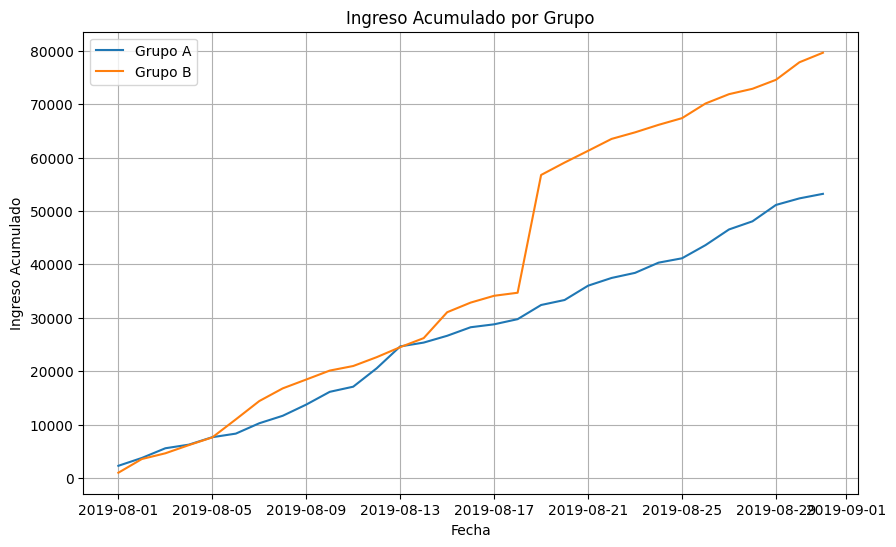

In [12]:
# Cálculo del ingreso acumulado por grupo
orders_grouped = df_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
orders_grouped['cumulative_revenue'] = orders_grouped.groupby('group')['revenue'].cumsum()

# Representar gráficamente el ingreso acumulado por grupo
plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    plt.plot(orders_grouped[orders_grouped['group'] == group]['date'], 
             orders_grouped[orders_grouped['group'] == group]['cumulative_revenue'], label=f'Grupo {group}')

plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de los ingresos acumulados por grupo.   </div>

#### Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>En los primeros 5 días, el tamaño de pedidos promedios acumulados del grupo A eran superiores al grupo B.</font>
* <font color='#613EF0'>Aproximadamente, desde el 17 de agosto, el tamaño de pedidos promedio acumulado del Grupo B superó por mucho al grupo A.</font>

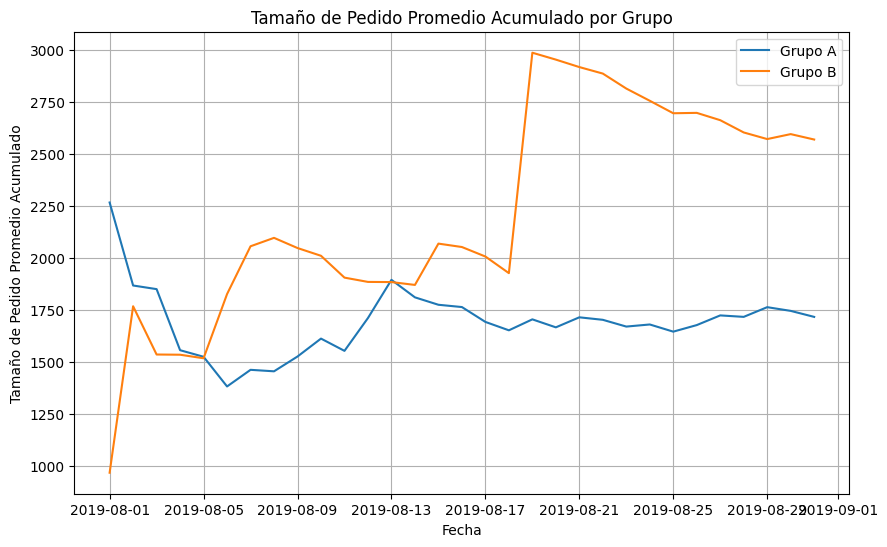

In [13]:
# Cálculo del tamaño de pedido promedio acumulado por grupo
orders_grouped['cumulative_avg_order_size'] = orders_grouped.groupby('group')['revenue'].cumsum() / orders_grouped.groupby('group').cumcount().add(1)

# Representar gráficamente el tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    plt.plot(orders_grouped[orders_grouped['group'] == group]['date'], 
             orders_grouped[orders_grouped['group'] == group]['cumulative_avg_order_size'], label=f'Grupo {group}')

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico del tamaño de pedido promedio acumulado por grupo..   </div>

#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>En los primeros 9 o 10 días, el grupo B tiene un tamaño de pedido promedio acumulado mayor que el grupo A, lo que podría sugerir que las hipótesis aplicadas al grupo B han tenido un efecto positivo en el aumento del tamaño de los pedidos.</font>
* <font color='#613EF0'>Solo desde los días 10 hasta el 17 de agosto, no hay una diferencia clara entre los grupos, lo que podría indicar que las hipótesis probadas no han tenido un impacto significativo o que es necesario más tiempo para observar los efectos.</font>

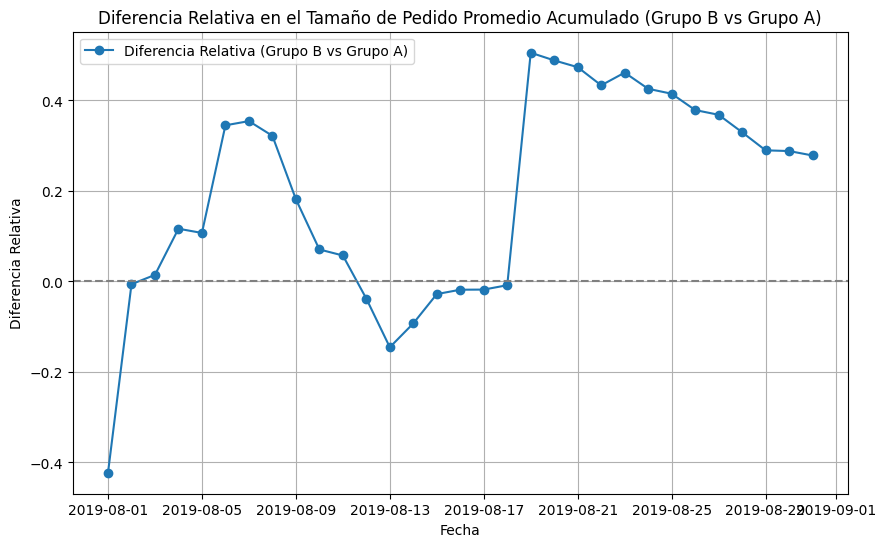

In [14]:
# Calcular el ingreso acumulado y el número de pedidos acumulados por grupo
orders_grouped = df_orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'count'}).reset_index()
orders_grouped['cumulative_revenue'] = orders_grouped.groupby('group')['revenue'].cumsum()
orders_grouped['cumulative_orders'] = orders_grouped.groupby('group')['transactionId'].cumsum()

# Calcular el tamaño de pedido promedio acumulado por grupo
orders_grouped['cumulative_avg_order_size'] = orders_grouped['cumulative_revenue'] / orders_grouped['cumulative_orders']

# Separar los datos por grupo
group_a = orders_grouped[orders_grouped['group'] == 'A']
group_b = orders_grouped[orders_grouped['group'] == 'B']

# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado (B en comparación con A)
merged = pd.merge(group_a[['date', 'cumulative_avg_order_size']], 
                  group_b[['date', 'cumulative_avg_order_size']], 
                  on='date', 
                  suffixes=('_A', '_B'))

merged['relative_difference'] = (merged['cumulative_avg_order_size_B'] / merged['cumulative_avg_order_size_A'] - 1)

# Representar gráficamente la diferencia relativa
plt.figure(figsize=(10, 6))
plt.plot(merged['date'], merged['relative_difference'], label='Diferencia Relativa (Grupo B vs Grupo A)', marker='o')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A  </div>

#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. 

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>La tasa de conversión del grupo B es consistentemente más alta que la del grupo A. Por lo cuál, se puede inferir que las modificaciones realizadas al grupo B (como las hipótesis probadas) están siendo efectivas.</font>

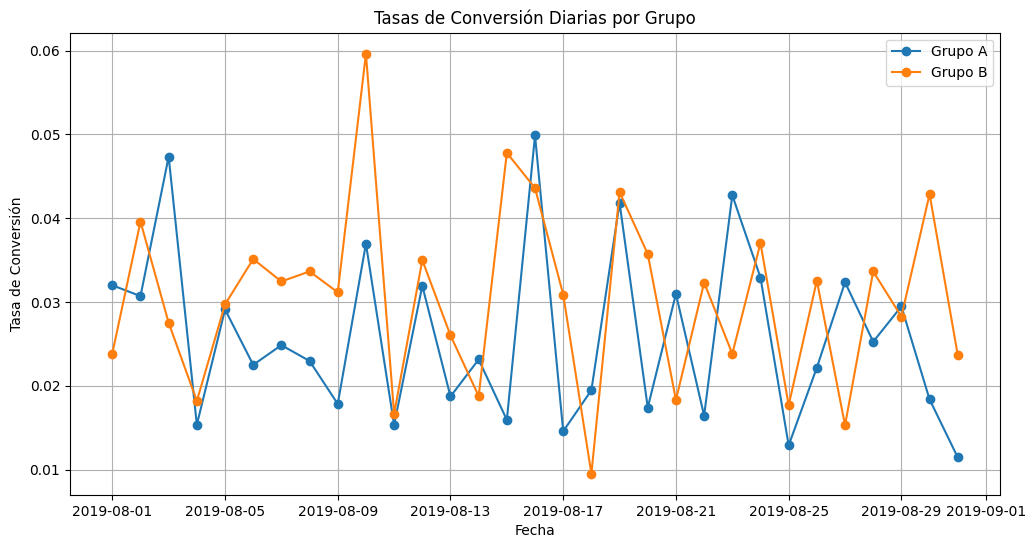

In [15]:
# Calcular el número de pedidos diarios por grupo
daily_orders = df_orders.groupby(['date', 'group']).agg({'transactionId': 'count'}).reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Fusionar con los datos de visitas para calcular la tasa de conversión
merged_data = pd.merge(df_visits, daily_orders, on=['date', 'group'], how='left')
merged_data['orders'] = merged_data['orders'].fillna(0)  # Llenar los días sin pedidos con 0
merged_data['conversion_rate'] = merged_data['orders'] / merged_data['visits']

# Separar los datos por grupo
conversion_a = merged_data[merged_data['group'] == 'A']
conversion_b = merged_data[merged_data['group'] == 'B']

# Representar gráficamente las tasas de conversión diarias de ambos grupos
plt.figure(figsize=(12, 6))
plt.plot(conversion_a['date'], conversion_a['conversion_rate'], label='Grupo A', marker='o')
plt.plot(conversion_b['date'], conversion_b['conversion_rate'], label='Grupo B', marker='o')
plt.title('Tasas de Conversión Diarias por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con el cálculo y gráfico de la tasa de conversión diaria por grupo. </div>

#### Traza un gráfico de dispersión del número de pedidos por usuario.

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>La mayoría de los puntos se concentran cerca del eje de los usuarios, en otras palabras, los usuarios realizan un solo pedido.</font>
* <font color='#613EF0'>Existen pocos usuarios que realizan de 2 a 3 pedidos.</font>

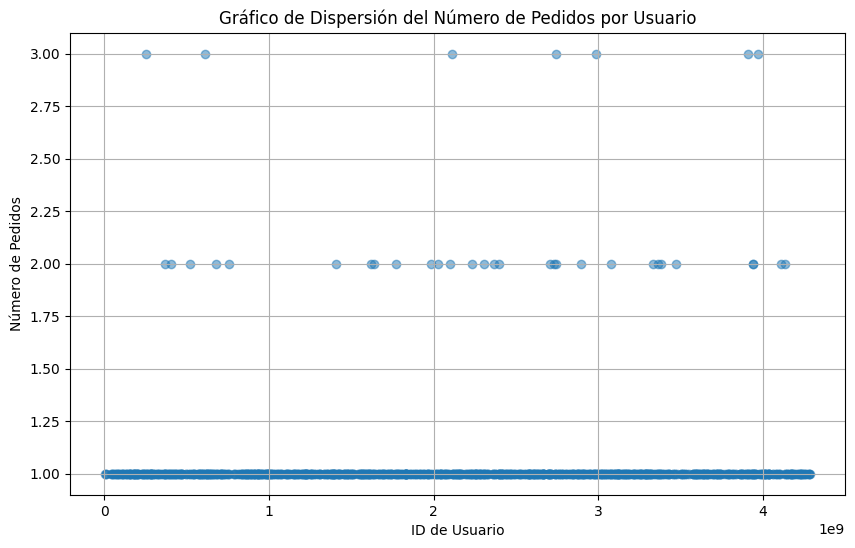

In [16]:
# Calcular el número de pedidos por usuario
orders_per_user = df_orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.rename(columns={'transactionId': 'orders'}, inplace=True)

# Representar gráficamente el número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5)
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del numero de pedidos por cliente.   </div>

#### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>El percentil 95 tiene a los usuarios que han realizado 1 solo pedido.</font>
* <font color='#613EF0'>El percentil 99 tiene a los usuarios que han realizado 2 pedidos.</font>
* <font color='#613EF0'>Se puede concluir que, los usuarios que hayan realizado más de 2 pedidos, serán consideradas anomalías externas.</font>

In [17]:
# Calcular el número de pedidos por usuario
orders_per_user = df_orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.rename(columns={'transactionId': 'orders'}, inplace=True)

# Calcular los percentiles 95 y 99
percentile_95 = np.percentile(orders_per_user['orders'], 95)
percentile_99 = np.percentile(orders_per_user['orders'], 99)

print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

# Definir umbrales de anomalía
anomaly_threshold_moderate = percentile_95
anomaly_threshold_extreme = percentile_99

print(f"Umbral de Anomalía Moderada (Percentil 95): {anomaly_threshold_moderate}")
print(f"Umbral de Anomalía Extrema (Percentil 99): {anomaly_threshold_extreme}")

Percentil 95: 1.0
Percentil 99: 2.0
Umbral de Anomalía Moderada (Percentil 95): 1.0
Umbral de Anomalía Extrema (Percentil 99): 2.0


#### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

<font color='#613EF0'>Conclusiones y conjeturas: </font>
* <font color='#613EF0'>Los precios de los pedidos se hubican mayormente entre el rango de 0 a 2500 dólares.</font>

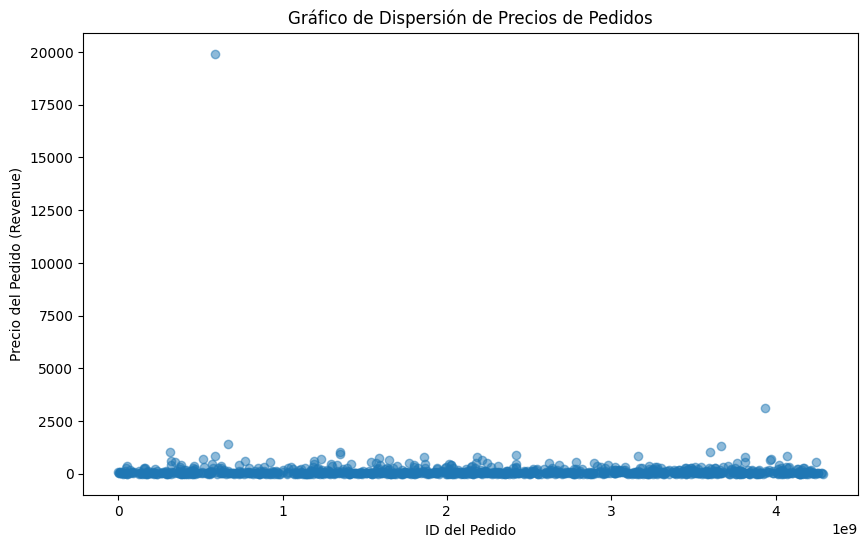

In [18]:
# Crear el gráfico de dispersión de precios de pedidos
plt.figure(figsize=(10, 6))
plt.scatter(df_orders['transactionId'], df_orders['revenue'], alpha=0.5)
plt.xlabel('ID del Pedido')
plt.ylabel('Precio del Pedido (Revenue)')
plt.title('Gráfico de Dispersión de Precios de Pedidos')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del precio de los pedidos. </div>

#### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

<font color='#613EF0'>Conclusiones y conjeturas: </font>

* <font color='#613EF0'>El percentil 95 tiene a los precios de los pedidos desde 0 a 414.275 dólares.</font>
* <font color='#613EF0'>El percentil 99 tiene a los precios de los que no superen los 830.3 dólares.</font>
* <font color='#613EF0'>Se puede concluir que los pedidos con un precio mayor a 830.3 dólares, serán consideradas anomalías externas.</font>

In [19]:
# Calcular los percentiles 95 y 99 de los precios de los pedidos
percentile_95_price = np.percentile(df_orders['revenue'], 95)
percentile_99_price = np.percentile(df_orders['revenue'], 99)

print(f"Percentil 95 del precio de pedidos: {percentile_95_price}")
print(f"Percentil 99 del precio de pedidos: {percentile_99_price}")

# Definir umbrales de anomalía
anomaly_threshold_price_moderate = percentile_95_price
anomaly_threshold_price_extreme = percentile_99_price

print(f"Umbral de Anomalía Moderada (Percentil 95): {anomaly_threshold_price_moderate}")
print(f"Umbral de Anomalía Extrema (Percentil 99): {anomaly_threshold_price_extreme}")

Percentil 95 del precio de pedidos: 414.275
Percentil 99 del precio de pedidos: 830.3
Umbral de Anomalía Moderada (Percentil 95): 414.275
Umbral de Anomalía Extrema (Percentil 99): 830.3


#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

<font color='#613EF0'>Conclusiones y conjeturas: </font>

* <font color='#613EF0'>La diferencia en la tasa de conversión es 0.035 que es menor a 0.05, lo cual la diferencia en la tasa de conversión es significativa.</font>
* <font color='#613EF0'>La diferencia relativa de 0.184 indica que tan superior es la tasa de conversión del grupo B en comparación con el grupo A.</font>

In [20]:
# Leer los datos
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

orders = pd.read_csv('/datasets/orders_us.csv')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

# Calcular el número de pedidos por usuario en cada grupo
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Identificar usuarios anómalos (con más de 2 pedidos o pedidos caros)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Eliminar los usuarios anómalos
filtered_orders_A = orders[np.logical_and(
    orders['group'] == 'A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers))
)]
filtered_orders_B = orders[np.logical_and(
    orders['group'] == 'B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers))
)]

# Calcular la tasa de conversión diaria por grupo
conversion_A = filtered_orders_A.groupby('date')['transactionId'].nunique() / visitors[visitors['group'] == 'A'].groupby('date')['visits'].sum()
conversion_B = filtered_orders_B.groupby('date')['transactionId'].nunique() / visitors[visitors['group'] == 'B'].groupby('date')['visits'].sum()

# Realizar la prueba de Mann-Whitney U para comparar las tasas de conversión
p_value_conversion = stats.mannwhitneyu(conversion_A, conversion_B)[1]
print(f"Valor p para la diferencia en la tasa de conversión: {p_value_conversion:.3f}")

# Calcular la diferencia relativa en la tasa de conversión media entre los grupos
conversion_diff = (conversion_B.mean() / conversion_A.mean()) - 1
print(f"Diferencia relativa en la tasa de conversión media: {conversion_diff:.3f}")

Valor p para la diferencia en la tasa de conversión: 0.035
Diferencia relativa en la tasa de conversión media: 0.184


#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

<font color='#613EF0'>Conclusiones y conjeturas: </font>

* <font color='#613EF0'>La diferencia en el tamaño promedio de pedido es 0.845 que es mayor a 0.05. Esto sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia en el tamaño promedio de los pedidos entre los grupos A y B.</font>
* <font color='#613EF0'>La diferencia relativa de -0.020 indica que el tamaño promedio del pedido en el grupo B es aproximadamente un 2% menor en comparación con el grupo A.
Aunque esta diferencia es pequeña, el hecho de que el valor p sea alto refuerza que esta diferencia no es estadísticamente significativa.</font>

In [21]:
# Leer los datos de pedidos
orders = pd.read_csv('/datasets/orders_us.csv')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

# Calcular el número de pedidos por usuario en cada grupo
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Identificar usuarios anómalos (con más de 2 pedidos o pedidos caros)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Eliminar los usuarios anómalos
filtered_orders_A = orders[np.logical_and(
    orders['group'] == 'A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers))
)]
filtered_orders_B = orders[np.logical_and(
    orders['group'] == 'B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers))
)]

# Aplicar la prueba de Mann-Whitney U para el tamaño promedio de pedido
p_value_average_order = stats.mannwhitneyu(
    filtered_orders_A['revenue'],
    filtered_orders_B['revenue']
)[1]

print(f"Valor p para la diferencia en el tamaño promedio de pedido: {p_value_average_order:.3f}")

# Calcular la diferencia relativa en el tamaño promedio de pedido
average_order_diff = (filtered_orders_B['revenue'].mean() / filtered_orders_A['revenue'].mean()) - 1
print(f"Diferencia relativa en el tamaño promedio de pedido: {average_order_diff:.3f}")

Valor p para la diferencia en el tamaño promedio de pedido: 0.845
Diferencia relativa en el tamaño promedio de pedido: -0.020


#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. 

<font color='#613EF0'>Conclusiones y conjeturas: </font>

* <font color='#613EF0'>La diferencia en la tasa de conversión es 0.038 que es menor a 0.05, lo cual la diferencia en la tasa de conversión es significativa.</font>
* <font color='#613EF0'>La diferencia relativa de 0.199 indica que tan superior es la tasa de conversión del grupo B en comparación con el grupo A.</font>

In [22]:
# Calcular el número de pedidos por usuario en cada grupo
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Identificar usuarios anómalos (con más de 2 pedidos o pedidos caros)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Eliminar los usuarios anómalos
filtered_orders_A = df_orders[np.logical_and(
    df_orders['group'] == 'A',
    np.logical_not(df_orders['visitorId'].isin(abnormalUsers))
)]
filtered_orders_B = df_orders[np.logical_and(
    df_orders['group'] == 'B',
    np.logical_not(df_orders['visitorId'].isin(abnormalUsers))
)]

# Calcular la tasa de conversión diaria por grupo
conversion_A = filtered_orders_A.groupby('date')['transactionId'].nunique() / df_visits[df_visits['group'] == 'A'].groupby('date')['visits'].sum()
conversion_B = filtered_orders_B.groupby('date')['transactionId'].nunique() / df_visits[df_visits['group'] == 'B'].groupby('date')['visits'].sum()

# Realizar la prueba de Mann-Whitney U para comparar las tasas de conversión
p_value_conversion = stats.mannwhitneyu(conversion_A, conversion_B)[1]
print(f"Valor p para la diferencia en la tasa de conversión: {p_value_conversion:.3f}")

# Calcular la diferencia relativa en la tasa de conversión media entre los grupos
conversion_diff = (conversion_B.mean() / conversion_A.mean()) - 1
print(f"Diferencia relativa en la tasa de conversión media: {conversion_diff:.3f}")

Valor p para la diferencia en la tasa de conversión: 0.038
Diferencia relativa en la tasa de conversión media: 0.199


#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

<font color='#613EF0'>Conclusiones y conjeturas: </font>

* <font color='#613EF0'>La diferencia en el tamaño promedio de pedido es 0.822 que es mayor a 0.05. Esto sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia en el tamaño promedio de los pedidos entre los grupos A y B.</font>
* <font color='#613EF0'>La diferencia relativa de -0.032 indica que el tamaño promedio del pedido en el grupo B es aproximadamente un 3% menor en comparación con el grupo A.
Aunque esta diferencia es pequeña, el hecho de que el valor p sea alto refuerza que esta diferencia no es estadísticamente significativa.</font>

In [23]:
# Calcular el número de pedidos por usuario en cada grupo
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Identificar usuarios anómalos (con más de 2 pedidos o pedidos caros)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 830.3]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Eliminar los usuarios anómalos
filtered_orders_A = df_orders[np.logical_and(
    df_orders['group'] == 'A',
    np.logical_not(df_orders['visitorId'].isin(abnormalUsers))
)]
filtered_orders_B = df_orders[np.logical_and(
    df_orders['group'] == 'B',
    np.logical_not(df_orders['visitorId'].isin(abnormalUsers))
)]

# Aplicar la prueba de Mann-Whitney U para el tamaño promedio de pedido
p_value_average_order = stats.mannwhitneyu(
    filtered_orders_A['revenue'],
    filtered_orders_B['revenue']
)[1]

print(f"Valor p para la diferencia en el tamaño promedio de pedido: {p_value_average_order:.3f}")

# Calcular la diferencia relativa en el tamaño promedio de pedido
average_order_diff = (filtered_orders_B['revenue'].mean() / filtered_orders_A['revenue'].mean()) - 1
print(f"Diferencia relativa en el tamaño promedio de pedido: {average_order_diff:.3f}")

Valor p para la diferencia en el tamaño promedio de pedido: 0.822
Diferencia relativa en el tamaño promedio de pedido: -0.032



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>



Excelente trabajo con el desarrollo de esta sección donde hacemos las pruebas estadísticas </div>

### Resultados y conclusiones

#### Tomar una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

* <font color='#613EF0'> Dado que los resultados muestran una diferencia significativa en la tasa de conversión y el grupo B muestra una tasa de conversión más alta, se puede considerar implementar la estrategía del grupo B como la opción preferida. La diferencia en la tasa de conversión es relevante y estadísticamente significativa, lo que sugiere que el cambio en el grupo B ha tenido un impacto positivo en la conversión.</font>

* <font color='#613EF0'> Como la diferencia en el tamaño promedio de pedido no es significativa y los valores p son altos, no hay evidencia suficiente para afirmar que el tamaño promedio del pedido es diferente entre los grupos A y B. En consecuencia, no se debería basar decisiones en este aspecto ya que no muestra una diferencia significativa.</font>

* <font color='#613EF0'> Dado que el objetivo final es aumentar los ingresos y se aumenta los ingresos con muchos mas clientes, se debería implementar la estrategia del grupo B. </font>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Muy buen trabajo, Ariel! Gran trabajo con el desarrollo del proyecto, pudiste desarrollar manera perfecta cada uno de los ejercicios y la interpetración que acompaña a cada apartado. Sigue esforzándote!
</div>